## Further explore the original dataset and perform data cleaning

### Requirements
 - Run `01-initial_data_exploration.ipynb` notebook first to ensure you're working with the same dataset (2022-2024)


At this stage, let's combine selected dataset files into a single dataframe, analyze it and clean the data points that are not contributing to the predictions

In [1]:
import glob
import openpyxl
import pandas as pd
import os

# Path to the dataset directory
raw_data_dir = '../data/raw/delay-data'

# Check if the directory exists
if not os.path.exists(raw_data_dir):
    print(f"Directory {raw_data_dir} does not exist!")

# Retrieve a list of all Excel files in the specified directory
file_list = glob.glob(os.path.join(raw_data_dir, "*.xlsx"))

# Check if there are files to process
if not file_list:
    print("No files found in the specified directory!")
else:
    # Load and merge all Excel files into a single DataFrame
    df = pd.concat([pd.read_excel(file, engine="openpyxl") for file in file_list], ignore_index=True)

    # Display the first few rows of the combined DataFrame
    print(df.head())


        Date   Time       Day                 Station   Code  Min Delay  \
0 2022-01-01  15:59  Saturday   LAWRENCE EAST STATION   SRDP          0   
1 2022-01-01  02:23  Saturday      SPADINA BD STATION   MUIS          0   
2 2022-01-01  22:00  Saturday  KENNEDY SRT STATION TO    MRO          0   
3 2022-01-01  02:28  Saturday      VAUGHAN MC STATION   MUIS          0   
4 2022-01-01  02:34  Saturday        EGLINTON STATION  MUATC          0   

   Min Gap Bound Line  Vehicle  
0        0     N  SRT     3023  
1        0   NaN   BD        0  
2        0   NaN  SRT        0  
3        0   NaN   YU        0  
4        0     S   YU     5981  


Here is a combined dataset containing approximately 70,000 data points.

In [2]:
df

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
0,2022-01-01,15:59,Saturday,LAWRENCE EAST STATION,SRDP,0,0,N,SRT,3023
1,2022-01-01,02:23,Saturday,SPADINA BD STATION,MUIS,0,0,NaN,BD,0
2,2022-01-01,22:00,Saturday,KENNEDY SRT STATION TO,MRO,0,0,NaN,SRT,0
3,2022-01-01,02:28,Saturday,VAUGHAN MC STATION,MUIS,0,0,NaN,YU,0
4,2022-01-01,02:34,Saturday,EGLINTON STATION,MUATC,0,0,S,YU,5981
...,...,...,...,...,...,...,...,...,...,...
69306,2024-12-31,01:55,Tuesday,KENNEDY BD STATION,MUTO,0,0,E,BD,5338
69307,2024-12-31,11:05,Tuesday,SHEPPARD-YONGE STATION,PUOPO,0,0,E,SHP,6151
69308,2024-12-31,13:14,Tuesday,DON MILLS STATION,MUSC,0,0,W,SHP,6156
69309,2024-12-31,16:20,Tuesday,SHEPPARD-YONGE STATION,EUSC,0,0,E,SHP,6151


As evidenced by the following output, there are numerous missing `Bound` values. Furthermore, some are missing in the `Line` attribute.

Here is a combined dataset containing approximately 70,000 data points.

In [3]:
print(df.info())  # Shows data types, non-null counts, and memory usage



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69311 entries, 0 to 69310
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       69311 non-null  datetime64[ns]
 1   Time       69311 non-null  object        
 2   Day        69311 non-null  object        
 3   Station    69311 non-null  object        
 4   Code       69311 non-null  object        
 5   Min Delay  69311 non-null  int64         
 6   Min Gap    69311 non-null  int64         
 7   Bound      45719 non-null  object        
 8   Line       69180 non-null  object        
 9   Vehicle    69311 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 5.3+ MB
None


In [4]:
print(df.describe())  # Summary stats like mean, min, max, std, etc.


                                Date     Min Delay       Min Gap       Vehicle
count                          69311  69311.000000  69311.000000  69311.000000
mean   2023-08-05 14:51:33.431057408      3.110026      4.547705   3259.123718
min              2022-01-01 00:00:00      0.000000      0.000000      0.000000
25%              2022-11-16 00:00:00      0.000000      0.000000      0.000000
50%              2023-08-25 00:00:00      0.000000      0.000000   5120.000000
75%              2024-05-04 00:00:00      4.000000      8.000000   5616.000000
max              2024-12-31 00:00:00    716.000000    719.000000   9546.000000
std                              NaN     10.439003     11.258063   2725.745512


Let's remove observations with missing values:

In [5]:
# Drop rows with any missing values
df_cleaned = df.dropna()

# Display number of rows before and after cleaning
print("Rows before cleaning:", df.shape[0])
print("Rows after cleaning:", df_cleaned.shape[0])


Rows before cleaning: 69311
Rows after cleaning: 45703


And take another look at the resulting dataset:

In [6]:
print(df_cleaned.info())  # Shows data types, non-null counts, and memory usage

<class 'pandas.core.frame.DataFrame'>
Index: 45703 entries, 0 to 69310
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       45703 non-null  datetime64[ns]
 1   Time       45703 non-null  object        
 2   Day        45703 non-null  object        
 3   Station    45703 non-null  object        
 4   Code       45703 non-null  object        
 5   Min Delay  45703 non-null  int64         
 6   Min Gap    45703 non-null  int64         
 7   Bound      45703 non-null  object        
 8   Line       45703 non-null  object        
 9   Vehicle    45703 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 3.8+ MB
None


In [7]:
df_cleaned

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
0,2022-01-01,15:59,Saturday,LAWRENCE EAST STATION,SRDP,0,0,N,SRT,3023
4,2022-01-01,02:34,Saturday,EGLINTON STATION,MUATC,0,0,S,YU,5981
9,2022-01-01,07:43,Saturday,WILSON STATION,TUATC,10,0,S,YU,5896
11,2022-01-01,07:54,Saturday,FINCH STATION,MUSC,0,0,N,YU,5481
16,2022-01-01,08:12,Saturday,FINCH STATION,TUNOA,6,12,S,YU,0
...,...,...,...,...,...,...,...,...,...,...
69306,2024-12-31,01:55,Tuesday,KENNEDY BD STATION,MUTO,0,0,E,BD,5338
69307,2024-12-31,11:05,Tuesday,SHEPPARD-YONGE STATION,PUOPO,0,0,E,SHP,6151
69308,2024-12-31,13:14,Tuesday,DON MILLS STATION,MUSC,0,0,W,SHP,6156
69309,2024-12-31,16:20,Tuesday,SHEPPARD-YONGE STATION,EUSC,0,0,E,SHP,6151


The `Vehicle` column, although of numerical type, holds no predictive value. Therefore, it is advisable to convert its data type to a string.

In [8]:
# Convert the "Vehicle" column to String type
df_cleaned.loc[:, "Vehicle"] = df_cleaned["Vehicle"].astype(str)

# Verify the change
print(df_cleaned["Vehicle"].dtype)  # Should print 'object' (string in pandas)


object


/var/folders/d3/tbj59bxx5m79k_ztyd_k3_3h0000gn/T/ipykernel_82374/2836263907.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['3023' '5981' '5896' ... '6156' '6151' '6176']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_cleaned.loc[:, "Vehicle"] = df_cleaned["Vehicle"].astype(str)


It looks like `Min Delay` and `Min Gap` are the most of interest
Let's take further look at them, starting with how values are distributed

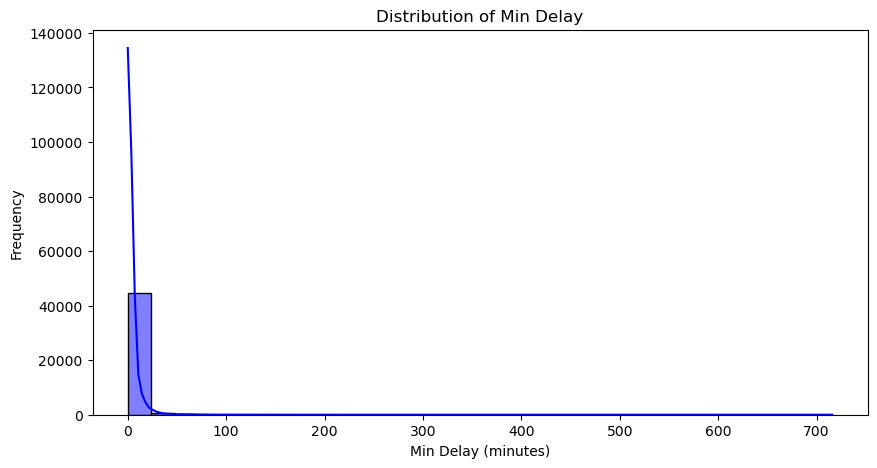

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Plot histogram of Min Delay
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned["Min Delay"], bins=30, kde=True, color="blue")

plt.xlabel("Min Delay (minutes)")
plt.ylabel("Frequency")
plt.title("Distribution of Min Delay")
plt.show()


The graph shows that there's a lot of zero values. Let's count them

In [10]:
import pandas as pd

# Count occurrences where Min Delay = 0 and Min Delay > 0
min_delay_counts = {
    "Min Delay = 0": (df_cleaned["Min Delay"] == 0).sum(),
    "Min Delay > 0": (df_cleaned["Min Delay"] > 0).sum()
}

# Convert to DataFrame for better readability
min_delay_counts_df = pd.DataFrame.from_dict(min_delay_counts, orient="index", columns=["Count"])

# Display the counts
print(min_delay_counts_df)


               Count
Min Delay = 0  19429
Min Delay > 0  26274


The count indicates nearly equal occurrences of zero values for the `Min Delay` feature.
Given our objective of predicting delays, it is likely that the model will not perform effectively in this scenario.
Therefore, it is imperative to remove zero values from the dataset to enhance the model's predictive capabilities.


In [11]:
# Remove rows where Min Delay is 0
df_cleaned = df_cleaned[df_cleaned["Min Delay"] > 0]

In [12]:
df_cleaned

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
9,2022-01-01,07:43,Saturday,WILSON STATION,TUATC,10,0,S,YU,5896
16,2022-01-01,08:12,Saturday,FINCH STATION,TUNOA,6,12,S,YU,0
17,2022-01-01,08:28,Saturday,GREENWOOD STATION,TUO,5,10,E,BD,5091
24,2022-01-01,09:45,Saturday,KENNEDY BD STATION,TUO,5,10,W,BD,5153
25,2022-01-01,09:51,Saturday,FINCH STATION,TUNOA,6,12,S,YU,0
...,...,...,...,...,...,...,...,...,...,...
69290,2024-12-31,23:18,Tuesday,MUSEUM STATION,MUPAA,3,8,S,YU,6081
69295,2024-12-31,00:08,Tuesday,UNION STATION,MUPR1,6,10,N,YU,5546
69303,2024-12-31,01:27,Tuesday,ST CLAIR WEST STATION,MUIR,13,18,N,YU,5416
69305,2024-12-31,01:37,Tuesday,DUNDAS WEST STATION,MUPAA,3,7,W,BD,5069


Now, let's take a look at how `Min Delay` values are distributed, as well as some statistics of a cleaned dataset

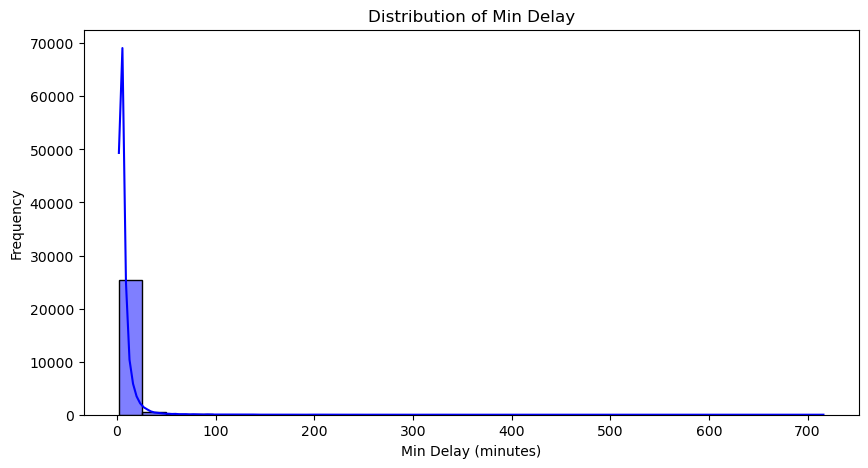

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Plot histogram of Min Delay
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned["Min Delay"], bins=30, kde=True, color="blue")

plt.xlabel("Min Delay (minutes)")
plt.ylabel("Frequency")
plt.title("Distribution of Min Delay")
plt.show()

In [14]:
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 26274 entries, 9 to 69310
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       26274 non-null  datetime64[ns]
 1   Time       26274 non-null  object        
 2   Day        26274 non-null  object        
 3   Station    26274 non-null  object        
 4   Code       26274 non-null  object        
 5   Min Delay  26274 non-null  int64         
 6   Min Gap    26274 non-null  int64         
 7   Bound      26274 non-null  object        
 8   Line       26274 non-null  object        
 9   Vehicle    26274 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 2.2+ MB
None


In [15]:
# Summary statistics for numerical columns
summary_stats = df_cleaned.describe()

# Display summary statistics
print(summary_stats)

                                Date     Min Delay       Min Gap
count                          26274  26274.000000  26274.000000
mean   2023-07-04 04:25:55.423612672      8.083619     11.828804
min              2022-01-01 00:00:00      2.000000      0.000000
25%              2022-09-26 00:00:00      3.000000      7.000000
50%              2023-07-04 00:00:00      5.000000      9.000000
75%              2024-04-11 00:00:00      8.000000     12.000000
max              2024-12-31 00:00:00    716.000000    719.000000
std                              NaN     15.335129     15.336937


Next, let's check if there are any outliers

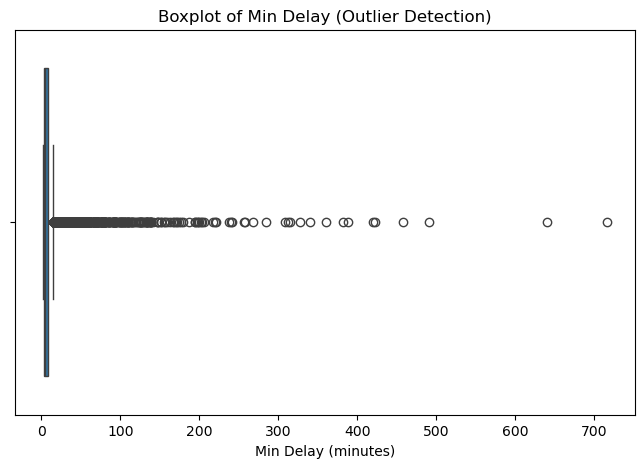

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot to detect outliers in Min Delay
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_cleaned["Min Delay"])

plt.xlabel("Min Delay (minutes)")
plt.title("Boxplot of Min Delay (Outlier Detection)")
plt.show()


Let's retrieve information about top 5 stations with delays

In [17]:
# Count the number of delays per station
station_counts = df_cleaned["Station"].value_counts().head(5)  # Top 5 stations with most delays

In [18]:
station_counts

Station
FINCH STATION         1118
EGLINTON STATION      1056
KENNEDY BD STATION     900
KIPLING STATION        873
BLOOR STATION          804
Name: count, dtype: int64

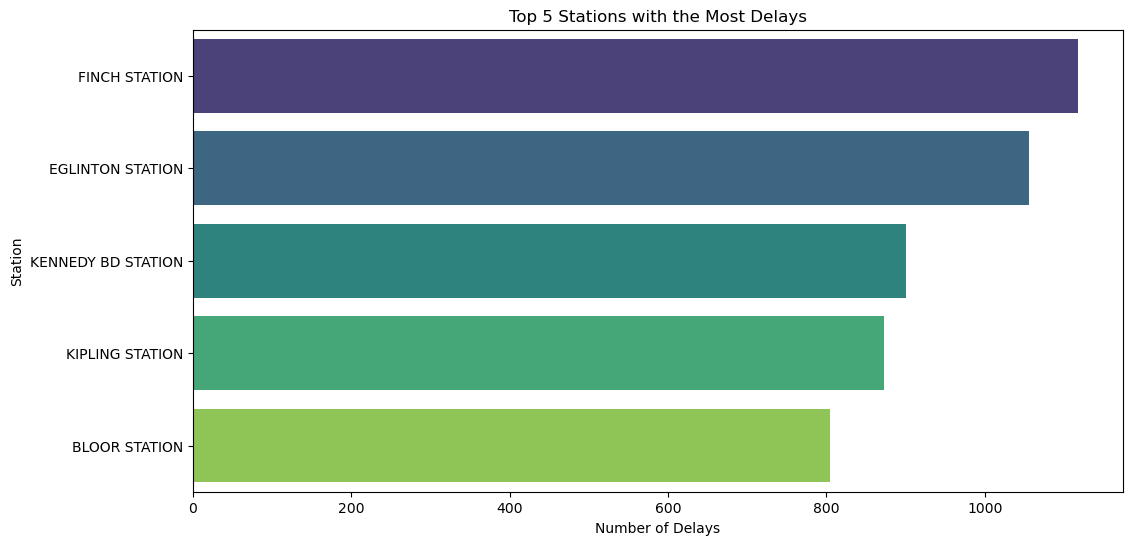

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of each station
station_counts = df_cleaned["Station"].value_counts().head(5)  # Top 5 stations

# Plot bar chart for Station distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=station_counts.values, y=station_counts.index, hue=station_counts.index, palette="viridis", legend=False)

plt.xlabel("Number of Delays")
plt.ylabel("Station")
plt.title("Top 5 Stations with the Most Delays")
plt.show()


It looks like we can keep only these stations in the resulting dataset

In [20]:
# Define the list of five stations to keep
selected_stations = ["BLOOR STATION", "KIPLING STATION", "FINCH STATION", "EGLINTON STATION", "KENNEDY BD STATION"]  # Replace with actual station names

# Filter the dataset to keep only these stations
df_cleaned = df_cleaned[df_cleaned["Station"].isin(selected_stations)]

# Display the number of remaining records
print("Rows after keeping only selected stations:", df_cleaned.shape[0])

Rows after keeping only selected stations: 4751


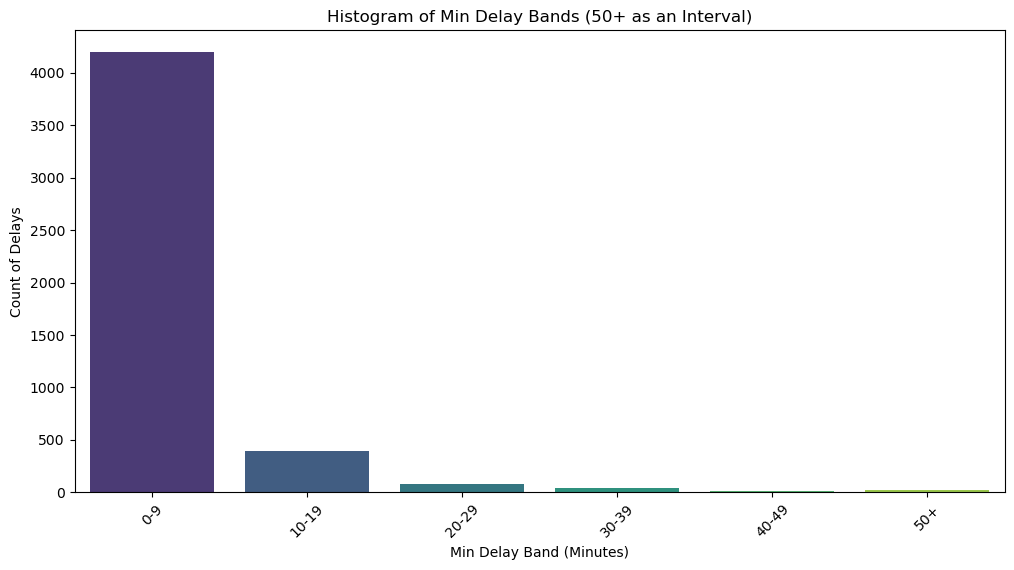

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure df_cleaned is defined before running this code

# Create bins for Min Delay in 10-minute intervals, with a single interval for delays > 50
bin_edges = [0, 10, 20, 30, 40, 50, df_cleaned["Min Delay"].max() + 1]  # Last bin is for >50
bin_labels = ["0-9", "10-19", "20-29", "30-39", "40-49", "50+"]

# Categorize delays into bins
df_cleaned = df_cleaned.copy()  # Create a copy to avoid SettingWithCopyWarning
df_cleaned["Delay Band"] = pd.cut(df_cleaned["Min Delay"], bins=bin_edges, labels=bin_labels, right=False)

# Count occurrences for each delay band
delay_band_counts_filtered = df_cleaned["Delay Band"].value_counts().sort_index()

# Plot histogram for Delay Bands
plt.figure(figsize=(12, 6))
sns.barplot(x=delay_band_counts_filtered.index, y=delay_band_counts_filtered.values, hue=delay_band_counts_filtered.index, palette="viridis", legend=False)

plt.xlabel("Min Delay Band (Minutes)")
plt.ylabel("Count of Delays")
plt.title("Histogram of Min Delay Bands (50+ as an Interval)")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


In [22]:
# Count the number of occurrences of Min Delay for each Delay Band
delay_band_counts = df_cleaned.groupby("Delay Band", observed=False)["Min Delay"].count().sort_index()

# Display the counts
print(delay_band_counts)

Delay Band
0-9      4197
10-19     394
20-29      82
30-39      45
40-49      12
50+        21
Name: Min Delay, dtype: int64


Based on the graph, we can remove delays greater than 50 minutes as they would affect the accuracy

In [23]:
# Remove rows where Min Delay is greater than 50
df_cleaned = df_cleaned[df_cleaned["Min Delay"] <= 50]

# Display the number of remaining records
print("Rows after removing Min Delay > 50:", df_cleaned.shape[0])


Rows after removing Min Delay > 50: 4731


In [24]:
print(df_cleaned.info())  # Shows data types, non-null counts, and memory usage

<class 'pandas.core.frame.DataFrame'>
Index: 4731 entries, 16 to 69248
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        4731 non-null   datetime64[ns]
 1   Time        4731 non-null   object        
 2   Day         4731 non-null   object        
 3   Station     4731 non-null   object        
 4   Code        4731 non-null   object        
 5   Min Delay   4731 non-null   int64         
 6   Min Gap     4731 non-null   int64         
 7   Bound       4731 non-null   object        
 8   Line        4731 non-null   object        
 9   Vehicle     4731 non-null   object        
 10  Delay Band  4731 non-null   category      
dtypes: category(1), datetime64[ns](1), int64(2), object(7)
memory usage: 411.4+ KB
None


In [25]:
df_cleaned

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,Delay Band
16,2022-01-01,08:12,Saturday,FINCH STATION,TUNOA,6,12,S,YU,0,0-9
24,2022-01-01,09:45,Saturday,KENNEDY BD STATION,TUO,5,10,W,BD,5153,0-9
25,2022-01-01,09:51,Saturday,FINCH STATION,TUNOA,6,12,S,YU,0,0-9
33,2022-01-01,18:20,Saturday,EGLINTON STATION,MUATC,3,10,S,YU,5481,0-9
35,2022-01-01,18:59,Saturday,EGLINTON STATION,MUATC,3,10,S,YU,5906,0-9
...,...,...,...,...,...,...,...,...,...,...,...
69232,2024-12-31,10:26,Tuesday,KENNEDY BD STATION,EUBO,3,6,W,BD,5173,0-9
69233,2024-12-31,10:46,Tuesday,KENNEDY BD STATION,EUSC,3,6,W,BD,5115,0-9
69235,2024-12-31,11:03,Tuesday,KIPLING STATION,MUTO,3,6,E,BD,5092,0-9
69243,2024-12-31,12:33,Tuesday,EGLINTON STATION,TUCC,10,13,N,YU,5766,10-19


Let's get some data 

In [26]:
import pandas as pd

# Generate statistics for the 'Bound' variable
bound_stats = df_cleaned["Bound"].describe(include="all")

# Display the statistics
print(bound_stats)


count     4731
unique       4
top          S
freq      1898
Name: Bound, dtype: object


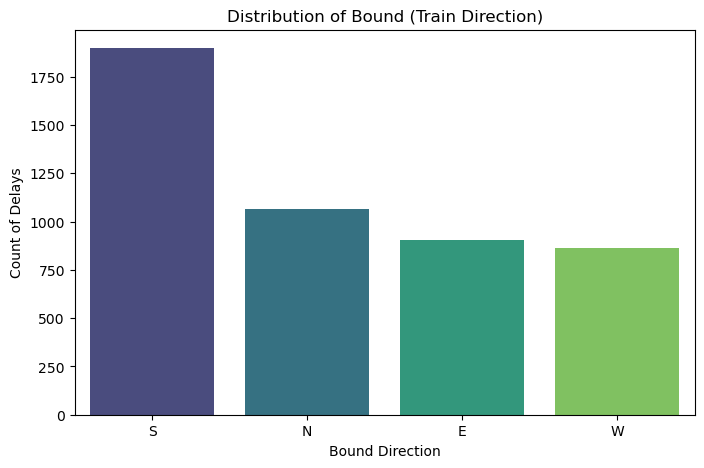

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of each unique value in Bound
bound_counts = df_cleaned["Bound"].value_counts()

# Plot bar chart for Bound distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=bound_counts.index, y=bound_counts.values, hue=bound_counts.index, palette="viridis", legend=False)

plt.xlabel("Bound Direction")
plt.ylabel("Count of Delays")
plt.title("Distribution of Bound (Train Direction)")
plt.show()


In [28]:
# Count occurrences of each unique value in Bound
bound_counts = df_cleaned["Bound"].value_counts()

# Display the counts
print(bound_counts)

Bound
S    1898
N    1065
E     906
W     862
Name: count, dtype: int64


In [29]:
import pandas as pd

# Define seasons based on the month
def categorize_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Fall"

# Convert "Date" column to datetime format (if not already)
df_cleaned["Date"] = pd.to_datetime(df_cleaned["Date"])

# Apply the function to categorize each date into a season
df_cleaned["Season"] = df_cleaned["Date"].apply(categorize_season)

# Remove the "Date" column after categorizing into seasons
df_cleaned = df_cleaned.drop(columns=["Date"], errors="ignore")

# Display the first few rows to verify
print(df_cleaned.head())



     Time       Day             Station   Code  Min Delay  Min Gap Bound Line  \
16  08:12  Saturday       FINCH STATION  TUNOA          6       12     S   YU   
24  09:45  Saturday  KENNEDY BD STATION    TUO          5       10     W   BD   
25  09:51  Saturday       FINCH STATION  TUNOA          6       12     S   YU   
33  18:20  Saturday    EGLINTON STATION  MUATC          3       10     S   YU   
35  18:59  Saturday    EGLINTON STATION  MUATC          3       10     S   YU   

   Vehicle Delay Band  Season  
16       0        0-9  Winter  
24    5153        0-9  Winter  
25       0        0-9  Winter  
33    5481        0-9  Winter  
35    5906        0-9  Winter  


In [30]:
# Define time categories based on the hour of the day
def categorize_time(time):
    hour = int(time.split(":")[0])  # Extract hour from time string
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"

# Apply the function to categorize each time into a time period
df_cleaned["Time Period"] = df_cleaned["Time"].apply(categorize_time)

# Remove the original "Time" column

df_cleaned = df_cleaned.drop(columns=["Time"], errors="ignore")

# Display the first few rows to verify

print(df_cleaned.head())


         Day             Station   Code  Min Delay  Min Gap Bound Line  \
16  Saturday       FINCH STATION  TUNOA          6       12     S   YU   
24  Saturday  KENNEDY BD STATION    TUO          5       10     W   BD   
25  Saturday       FINCH STATION  TUNOA          6       12     S   YU   
33  Saturday    EGLINTON STATION  MUATC          3       10     S   YU   
35  Saturday    EGLINTON STATION  MUATC          3       10     S   YU   

   Vehicle Delay Band  Season Time Period  
16       0        0-9  Winter     Morning  
24    5153        0-9  Winter     Morning  
25       0        0-9  Winter     Morning  
33    5481        0-9  Winter     Evening  
35    5906        0-9  Winter     Evening  


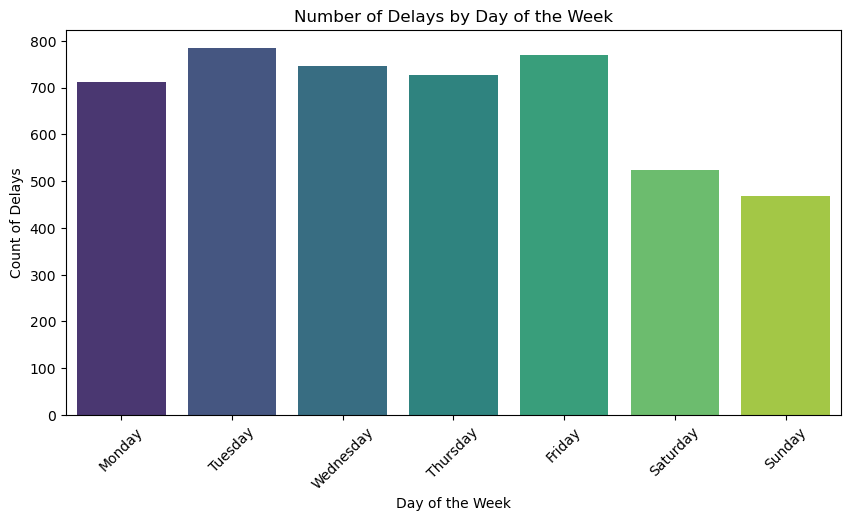

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the correct order for days of the week
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Count occurrences of each day and reorder based on the defined order
day_counts = df_cleaned["Day"].value_counts().reindex(day_order)

# Plot bar chart for Day distribution in correct order
plt.figure(figsize=(10, 5))
sns.barplot(x=day_counts.index, y=day_counts.values, hue=day_counts.index, palette="viridis", legend=False)

plt.xlabel("Day of the Week")
plt.ylabel("Count of Delays")
plt.title("Number of Delays by Day of the Week")
plt.xticks(rotation=45)
plt.show()


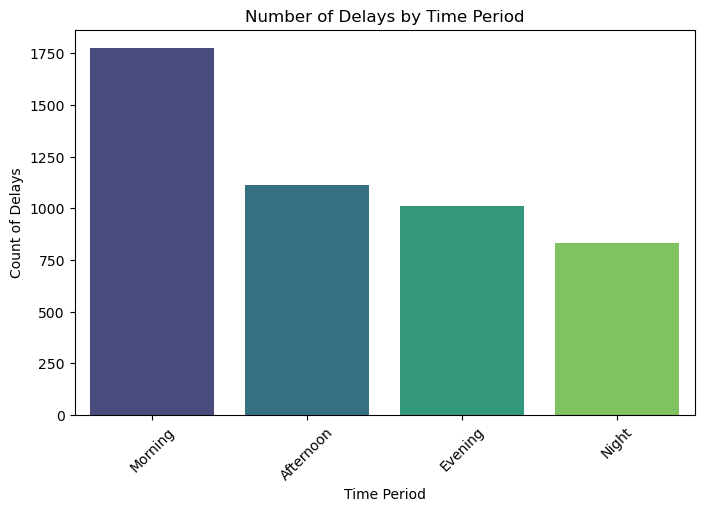

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the correct order for time periods
time_period_order = ["Morning", "Afternoon", "Evening", "Night"]

# Count occurrences of each time period and reorder them
time_period_counts = df_cleaned["Time Period"].value_counts().reindex(time_period_order)

# Plot bar chart for Time Period distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=time_period_counts.index, y=time_period_counts.values, hue=time_period_counts.index, palette="viridis", legend=False)

plt.xlabel("Time Period")
plt.ylabel("Count of Delays")
plt.title("Number of Delays by Time Period")
plt.xticks(rotation=45)
plt.show()


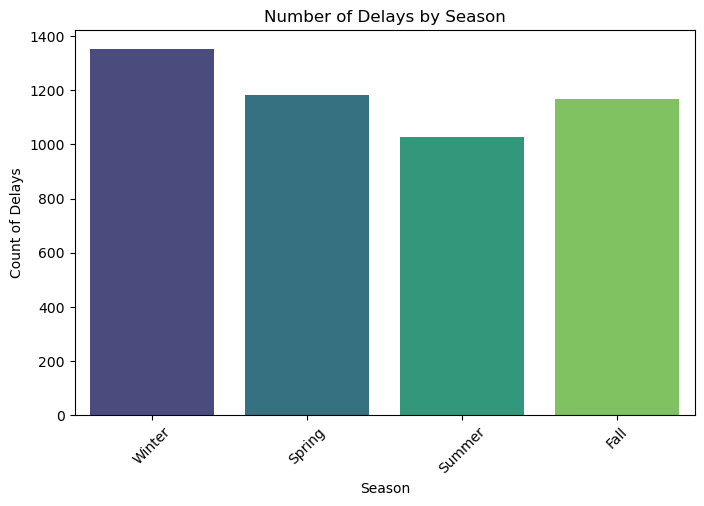

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the correct order for seasons
season_order = ["Winter", "Spring", "Summer", "Fall"]

# Count occurrences of each season and reorder them
season_counts = df_cleaned["Season"].value_counts().reindex(season_order)

# Plot bar chart for Season distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=season_counts.index, y=season_counts.values, hue=season_counts.index, palette="viridis", legend=False)

plt.xlabel("Season")
plt.ylabel("Count of Delays")
plt.title("Number of Delays by Season")
plt.xticks(rotation=45)
plt.show()


In [34]:
df_cleaned


,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,Delay Band,Season,Time Period
16,Saturday,FINCH STATION,TUNOA,6,12,S,YU,0,0-9,Winter,Morning
24,Saturday,KENNEDY BD STATION,TUO,5,10,W,BD,5153,0-9,Winter,Morning
25,Saturday,FINCH STATION,TUNOA,6,12,S,YU,0,0-9,Winter,Morning
33,Saturday,EGLINTON STATION,MUATC,3,10,S,YU,5481,0-9,Winter,Evening
35,Saturday,EGLINTON STATION,MUATC,3,10,S,YU,5906,0-9,Winter,Evening
...,...,...,...,...,...,...,...,...,...,...,...
69232,Tuesday,KENNEDY BD STATION,EUBO,3,6,W,BD,5173,0-9,Winter,Morning
69233,Tuesday,KENNEDY BD STATION,EUSC,3,6,W,BD,5115,0-9,Winter,Morning
69235,Tuesday,KIPLING STATION,MUTO,3,6,E,BD,5092,0-9,Winter,Morning
69243,Tuesday,EGLINTON STATION,TUCC,10,13,N,YU,5766,10-19,Winter,Afternoon


In [35]:
import pandas as pd

# Define a dictionary mapping each Code to its corresponding category
issue_categories = {
    "Electrical and Mechanical Systems (Train Equipment & Power)": 
        ["EUAC", "ERAC", "EUAL", "EUATC", "EUCH", "EUHV", "ERHV", "EULT", "ERLT", "EULV", 
         "ERLV", "EUPI", "ERPR", "EUSC", "MUSC", "EUTM", "EUTL", "ERTL", "PRSP", "PUSTP", 
         "PUSCA", "PUSI", "PUSIO", "PUSIS", "PUSNT"],

    "Train Operations & Control Systems": 
        ["ERTC", "PRSA", "PUSAC", "PRSL", "PRSO", "PUATC", "PRSW", "PRTST", "PUSTS", "PUCBI", 
         "PUCSS", "PUSLC", "PUTSC", "PUCSS", "PUDCS", "PUOPO", "PUSBE", "PUSSW", "PUSTC", 
         "PUSWZ", "PUSZC", "TUCC", "TRTC", "TUSET", "TRSET"],

    "Structural & Track-Related Issues": 
        ["PRW", "PUTR", "PUTTP", "PUTCD", "PUTD", "PUTIJ", "PUTNT", "PUTO", "PUTOE", "TUOPO", 
         "PUTS", "PUTSM", "PUTTC", "PUTWZ", "PUSO"],

    "Human & Operational Factors": 
        ["MUESA", "TUNOA", "TRNOA", "TUKEY", "TUML", "TUMVS", "TUNIP", "TRNIP", "TUO", "TRO", 
         "TUOS", "TUS", "TUSC", "TUSUP", "MUWR", "MUIE", "MRIE", "SUAE", "SRAE", "SUCOL", 
         "SRCOL", "SUEAS", "SREAS", "PUSEA", "SUO", "SRO"],

    "Miscellaneous & Passenger-Related Incidents": 
        ["EUDO", "ERDO", "EUOE", "MUCL", "MRCL", "MUEC", "MREC", "MUGD", "MUODC", "MUPAA", 
         "MRPAA", "PUMEL", "PREL", "PRO", "PRS", "PUMST", "PRST", "PUMO", "MUTO", "MUO", "MRO"]
}

# Create a function to categorize issues based on their Code
def categorize_issue(code):
    for category, codes in issue_categories.items():
        if code in codes:
            return category
    return "Other"  # Default category if not found

# Apply the categorization to create a new column "Issue Category"
df_cleaned["Issue Category"] = df_cleaned["Code"].apply(categorize_issue)

# Display the first few rows to verify the categorization
print(df_cleaned[["Code", "Issue Category"]].head())


     Code               Issue Category
16  TUNOA  Human & Operational Factors
24    TUO  Human & Operational Factors
25  TUNOA  Human & Operational Factors
33  MUATC                        Other
35  MUATC                        Other


In [36]:
import pandas as pd

# Count occurrences of each Issue Category
issue_category_counts = df_cleaned["Issue Category"].value_counts()

# Convert to DataFrame for better readability
issue_category_counts_df = issue_category_counts.to_frame().reset_index()
issue_category_counts_df.columns = ["Issue Category", "Count"]

# Display the counts
print(issue_category_counts_df)

                                      Issue Category  Count
0                                              Other   2531
1                        Human & Operational Factors   1062
2        Miscellaneous & Passenger-Related Incidents    694
3                 Train Operations & Control Systems    204
4                  Structural & Track-Related Issues    124
5  Electrical and Mechanical Systems (Train Equip...    116


In [37]:
import pandas as pd

# Remove specified columns from df_cleaned
df_cleaned = df_cleaned.drop(columns=["Delay Band", "Code"], errors="ignore")

# Display the first few rows to verify
print(df_cleaned.head())

         Day             Station  Min Delay  Min Gap Bound Line Vehicle  \
16  Saturday       FINCH STATION          6       12     S   YU       0   
24  Saturday  KENNEDY BD STATION          5       10     W   BD    5153   
25  Saturday       FINCH STATION          6       12     S   YU       0   
33  Saturday    EGLINTON STATION          3       10     S   YU    5481   
35  Saturday    EGLINTON STATION          3       10     S   YU    5906   

    Season Time Period               Issue Category  
16  Winter     Morning  Human & Operational Factors  
24  Winter     Morning  Human & Operational Factors  
25  Winter     Morning  Human & Operational Factors  
33  Winter     Evening                        Other  
35  Winter     Evening                        Other  


In [38]:
# Reorder the columns in df_cleaned
df_cleaned = df_cleaned[[
    "Min Delay", "Season", "Day", "Time Period", 
    "Station", "Bound", "Line", "Min Gap", "Issue Category"
]]

# Display the first few rows to verify the order
print(df_cleaned.head())

    Min Delay  Season       Day Time Period             Station Bound Line  \
16          6  Winter  Saturday     Morning       FINCH STATION     S   YU   
24          5  Winter  Saturday     Morning  KENNEDY BD STATION     W   BD   
25          6  Winter  Saturday     Morning       FINCH STATION     S   YU   
33          3  Winter  Saturday     Evening    EGLINTON STATION     S   YU   
35          3  Winter  Saturday     Evening    EGLINTON STATION     S   YU   

    Min Gap               Issue Category  
16       12  Human & Operational Factors  
24       10  Human & Operational Factors  
25       12  Human & Operational Factors  
33       10                        Other  
35       10                        Other  


In [39]:
 # Save df_cleaned to a CSV file
processed_data_dir = '../data/processed'
cleaned_data_file = 'df_cleaned.csv'
overwrite_file = True  # Set to True to overwrite the existing file
if overwrite_file:
    df_cleaned.to_csv(os.path.join(processed_data_dir, cleaned_data_file), index=False)
    print(f"Dataset saved as '{os.path.join(processed_data_dir, cleaned_data_file)}'")
else:
    print(f"Dataset already exists at '{os.path.join(processed_data_dir, cleaned_data_file)}'")


Dataset saved as '../data/processed/df_cleaned.csv'


In [40]:
import pandas as pd

# Calculate correlation
correlation = df_cleaned[["Min Delay", "Min Gap"]].corr()

# Display the correlation value
print("Correlation between Min Delay and Min Gap:")
print(correlation)


Correlation between Min Delay and Min Gap:
           Min Delay   Min Gap
Min Delay   1.000000  0.824631
Min Gap     0.824631  1.000000


In [41]:
df_cleaned

,Min Delay,Season,Day,Time Period,Station,Bound,Line,Min Gap,Issue Category
16,6,Winter,Saturday,Morning,FINCH STATION,S,YU,12,Human & Operational Factors
24,5,Winter,Saturday,Morning,KENNEDY BD STATION,W,BD,10,Human & Operational Factors
25,6,Winter,Saturday,Morning,FINCH STATION,S,YU,12,Human & Operational Factors
33,3,Winter,Saturday,Evening,EGLINTON STATION,S,YU,10,Other
35,3,Winter,Saturday,Evening,EGLINTON STATION,S,YU,10,Other
...,...,...,...,...,...,...,...,...,...
69232,3,Winter,Tuesday,Morning,KENNEDY BD STATION,W,BD,6,Other
69233,3,Winter,Tuesday,Morning,KENNEDY BD STATION,W,BD,6,Electrical and Mechanical Systems (Train Equip...
69235,3,Winter,Tuesday,Morning,KIPLING STATION,E,BD,6,Miscellaneous & Passenger-Related Incidents
69243,10,Winter,Tuesday,Afternoon,EGLINTON STATION,N,YU,13,Train Operations & Control Systems


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Encode categorical variables
categorical_features = ["Day", "Station", "Bound", "Line", "Season", "Time Period", "Issue Category"]
label_encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])  # Convert categories to numerical values
    label_encoders[col] = le  # Store encoders for future use

# Define the target variable and predictor variables
X = df_cleaned.drop(columns=["Min Delay"])  # All variables except "Min Delay"
y = df_cleaned["Min Delay"]  # Target variable

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features (improves model performance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display model performance metrics
print("Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Optional: Show feature importance (coefficients)
feature_importance = pd.DataFrame({"Feature": X.columns, "Coefficient": lr_model.coef_})
print("\nFeature Importance:")
print(feature_importance.sort_values(by="Coefficient", ascending=False))


Model Performance:
Mean Absolute Error (MAE): 1.33
Mean Squared Error (MSE): 6.16
Root Mean Squared Error (RMSE): 2.48
R² Score: 0.72

Feature Importance:
          Feature  Coefficient
6         Min Gap     4.302377
7  Issue Category     0.269271
1             Day     0.071046
4           Bound     0.001469
0          Season    -0.015948
2     Time Period    -0.036250
5            Line    -0.046723
3         Station    -0.175063


Decision Tree Model Performance:
Mean Absolute Error (MAE): 0.66
Mean Squared Error (MSE): 2.88
Root Mean Squared Error (RMSE): 1.70
R² Score: 0.87

Feature Importance:
          Feature  Importance
6         Min Gap    0.897314
0          Season    0.032635
1             Day    0.023168
7  Issue Category    0.020203
4           Bound    0.009989
2     Time Period    0.008785
3         Station    0.006096
5            Line    0.001810


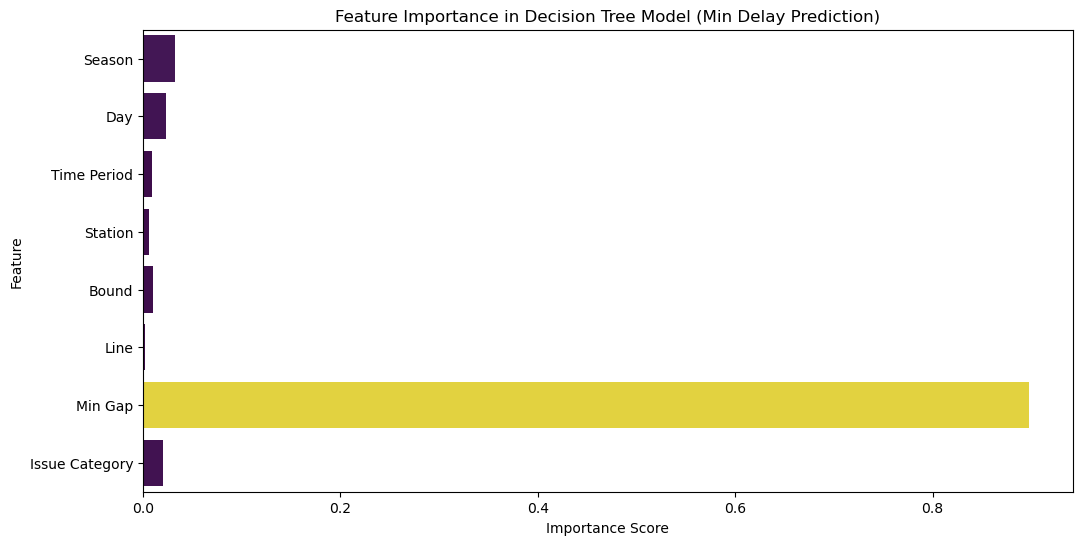

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Encode categorical variables
categorical_features = ["Day", "Station", "Bound", "Line", "Season", "Time Period", "Issue Category"]
label_encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])  # Convert categories to numerical values
    label_encoders[col] = le  # Store encoders for future use

# Define the target variable and predictor variables
X = df_cleaned.drop(columns=["Min Delay"])  # All variables except "Min Delay"
y = df_cleaned["Min Delay"]  # Target variable

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree Regression model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display model performance metrics
print("Decision Tree Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Optional: Show feature importance
feature_importance = pd.DataFrame({"Feature": X.columns, "Importance": dt_model.feature_importances_})
print("\nFeature Importance:")
print(feature_importance.sort_values(by="Importance", ascending=False))

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance["Importance"], y=feature_importance["Feature"], hue=feature_importance["Importance"], palette="viridis", legend=False)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Decision Tree Model (Min Delay Prediction)")
plt.show()


Random Forest Model Performance:
Mean Absolute Error (MAE): 0.59
Mean Squared Error (MSE): 1.61
Root Mean Squared Error (RMSE): 1.27
R² Score: 0.93

Feature Importance:
          Feature  Importance
6         Min Gap    0.895658
1             Day    0.027711
0          Season    0.023312
7  Issue Category    0.017607
3         Station    0.012647
4           Bound    0.012249
2     Time Period    0.008381
5            Line    0.002435


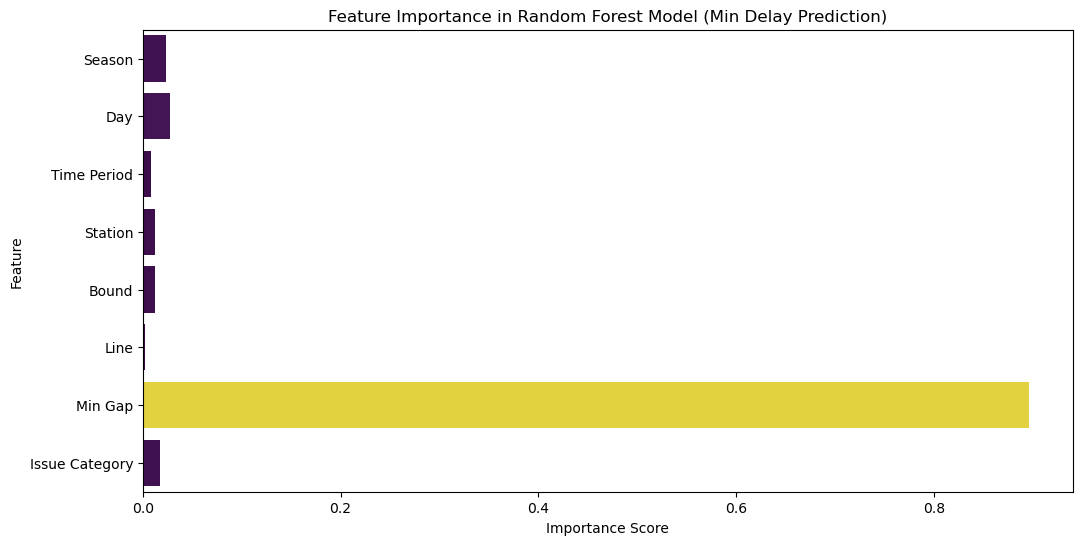

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Encode categorical variables
categorical_features = ["Day", "Station", "Bound", "Line", "Season", "Time Period", "Issue Category"]
label_encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])  # Convert categories to numerical values
    label_encoders[col] = le  # Store encoders for future use

# Define the target variable and predictor variables
X = df_cleaned.drop(columns=["Min Delay"])  # All variables except "Min Delay"
y = df_cleaned["Min Delay"]  # Target variable

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display model performance metrics
print("Random Forest Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Optional: Show feature importance
feature_importance = pd.DataFrame({"Feature": X.columns, "Importance": rf_model.feature_importances_})
print("\nFeature Importance:")
print(feature_importance.sort_values(by="Importance", ascending=False))

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance["Importance"], y=feature_importance["Feature"], hue=feature_importance["Importance"], palette="viridis", legend=False)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest Model (Min Delay Prediction)")
plt.show()


Decision Tree Model Performance:
Mean Absolute Error (MAE): 2.70
Mean Squared Error (MSE): 20.97
Root Mean Squared Error (RMSE): 4.58
R² Score: 0.03


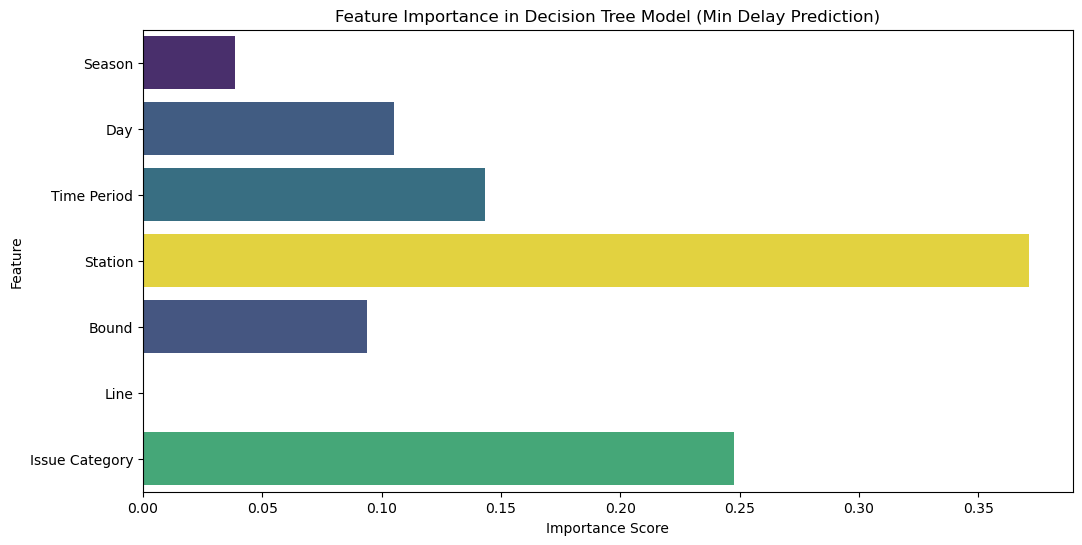

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Encode categorical variables
categorical_features = ["Day", "Station", "Bound", "Line", "Season", "Time Period", "Issue Category"]
label_encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])  # Convert categories to numerical values
    label_encoders[col] = le  # Store encoders for future use

# Define the target variable and predictor variables, dropping "Min Gap"
X = df_cleaned.drop(columns=["Min Delay", "Min Gap"])  # All variables except "Min Delay" and "Min Gap"
y = df_cleaned["Min Delay"]  # Target variable

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features (improves model performance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Decision Tree Regression model (Binary Tree)
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)  # Adjust max_depth as needed
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display model performance metrics
print("Decision Tree Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Feature Importance
feature_importance = pd.DataFrame({"Feature": X.columns, "Importance": dt_model.feature_importances_})

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance["Importance"], y=feature_importance["Feature"], hue=feature_importance["Importance"], palette="viridis", legend=False)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Decision Tree Model (Min Delay Prediction)")
plt.show()


In [46]:
# Train a Decision Tree model excluding Min Gap
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Feature Importance
feature_importance = pd.DataFrame({"Feature": X.columns, "Importance": dt_model.feature_importances_})
print(feature_importance.sort_values(by="Importance", ascending=False))


          Feature  Importance
3         Station    0.371071
6  Issue Category    0.247722
2     Time Period    0.143407
1             Day    0.105087
4           Bound    0.093959
0          Season    0.038754
5            Line    0.000000
